In [1]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import IPython
import soundfile as sf

from effects.reverb import *
from effects.tremolo import *

SAMPLE_RATE = 44100

In [3]:
signal, _ = sf.read("guitar_sample.wav", always_2d=True)
signal = signal[:4 * SAMPLE_RATE, :]
signal /= np.max(np.abs(signal),axis=0)

### Reverb Effect
For reverb effect I'm using library [rir_generator](https://rir-generator.readthedocs.io/en/latest/) to build room impulse responses for several different types of rooms. Smallest room is 2x2x2 and largest is 50x50x10

In [4]:
small_room_reverb_effect = ReverbEffect(SMALL_ROOM_REVERB, reverb_time=0.2)
medium_room_reverb_effect = ReverbEffect(MEDIUM_ROOM_REVERB, reverb_time=0.3)
large_room_reverb_effect = ReverbEffect(LARGE_ROOM_REVERB, reverb_time=0.5)
arena_reverb_effect = ReverbEffect(ARENA_REVERB, reverb_time=1.0)

In [5]:
small_room_reverbed_signal = small_room_reverb_effect.apply(signal)
medium_room_reverbed_signal = medium_room_reverb_effect.apply(signal)
large_room_reverbed_signal = large_room_reverb_effect.apply(signal)
arena_reverbed_signal = arena_reverb_effect.apply(signal)

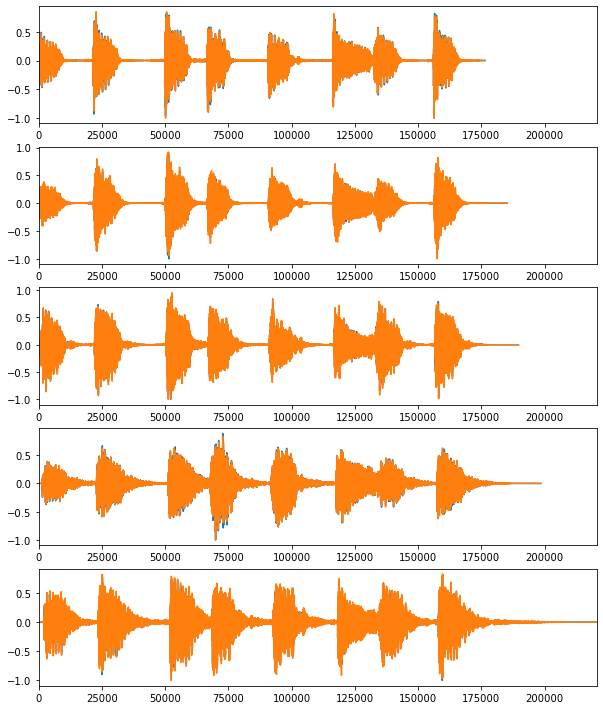

In [6]:
fig, axs = plt.subplots(5, 1)
fig.set_size_inches((10, 12.5))
for i in range(5):
    axs[i].set_xlim(right=5 * SAMPLE_RATE)
axs[0].plot(signal)
axs[1].plot(small_room_reverbed_signal)
axs[2].plot(medium_room_reverbed_signal)
axs[3].plot(large_room_reverbed_signal)
axs[4].plot(arena_reverbed_signal)

In [7]:
IPython.display.Audio(signal.T, rate=SAMPLE_RATE, autoplay=True)

In [8]:
IPython.display.Audio(small_room_reverbed_signal.T, rate=SAMPLE_RATE, autoplay=True)

In [9]:
IPython.display.Audio(medium_room_reverbed_signal.T, rate=SAMPLE_RATE, autoplay=True)

In [10]:
IPython.display.Audio(large_room_reverbed_signal.T, rate=SAMPLE_RATE, autoplay=True)

In [11]:
IPython.display.Audio(arena_reverbed_signal.T, rate=SAMPLE_RATE, autoplay=True)

In [12]:
signal_2, _ = sf.read("guitar_sample_2.wav", always_2d=True)
signal_2 /= np.max(np.abs(signal),axis=0)

### Tremolo Effect
Tremolo effect is defined by it's amp and frequency. Generates sine wave for tremolo and multiplies amp of raw signal with generated sine wave.

In [13]:
tremolo_effect = TremoloEffect(min_amp=0.5, freq=7)

In [14]:
tremolo_signal = tremolo_effect.apply(signal_2)

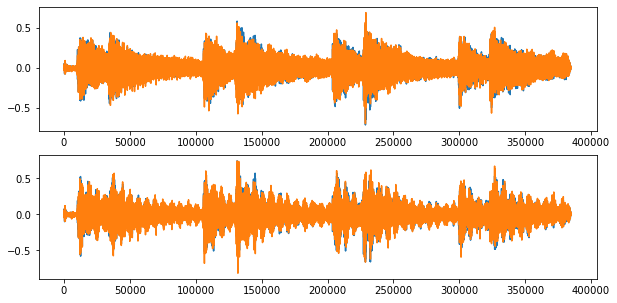

In [15]:
fig, axs = plt.subplots(2, 1)
fig.set_size_inches((10, 5))
axs[0].plot(signal_2)
axs[1].plot(tremolo_signal)

In [16]:
IPython.display.Audio(signal_2.T, rate=SAMPLE_RATE, autoplay=True)

In [17]:
IPython.display.Audio(tremolo_signal.T, rate=SAMPLE_RATE, autoplay=True)

In [18]:
tremolo_wave = tremolo_effect.get_tremolo_wave(N=2 * SAMPLE_RATE)

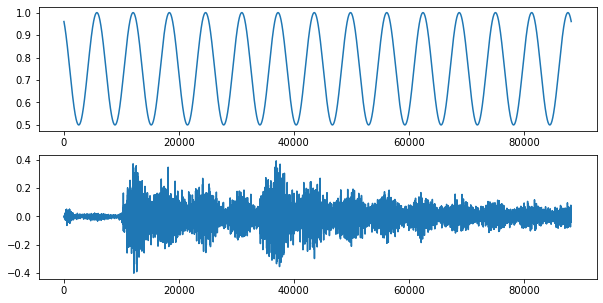

In [19]:
fig, axs = plt.subplots(2, 1)
fig.set_size_inches((10, 5))
axs[0].plot(tremolo_wave)
axs[1].plot(tremolo_wave * signal_2[:2 *SAMPLE_RATE, 0])